This is an exploration of the MNIST (Mixed National Institute of Standards and Technology database) data, which is a collection of 28 by 28 pixel images of hand drawn number characters in grayscale. They were collected from Kaggle.com. 
Here, I investigate the use of different classification algorithms on the data.
More research on this data can be found at http://yann.lecun.com/exdb/mnist/index.html.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pylab as plt
import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
df = pd.read_csv('train.csv')

Below is an example image.

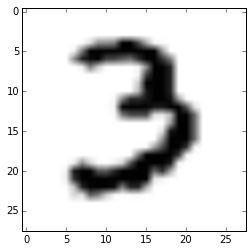

In [3]:
plt.set_cmap('Greys')
plt.imshow(df.loc[9][1:].reshape(28,28))

The dataframe below shows the format the data arrives in, after moving it from a csv file into pandas.

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
scores = []
for i in range(1,102,5):
    print i
    start = time.time()
    clf = RandomForestClassifier(i)
    clf.fit(X=df.drop('label',1)[:20000],y=df.label[:20000])
    stop = time.time()
    scores.append((i,clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000]),stop-start))

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101


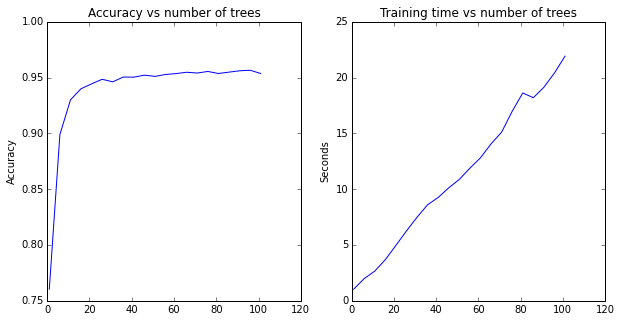

In [6]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5])
ax1.plot(map(lambda x: x[0],scores),map(lambda x: x[1],scores))
ax2.plot(map(lambda x: x[0],scores),map(lambda x: x[2],scores))
ax1.set_title('Accuracy vs number of trees')
ax2.set_title('Training time vs number of trees')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Seconds')

In [90]:
SVMscores = []
for i in range(1,10):
    print i
    start = time.time()
    clf = SVC(kernel='poly',degree=i)
    clf.fit(X=df.drop('label',1)[:2000],y=df.label[:2000])
    stop = time.time()
    SVMscores.append((i,clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000]),stop-start))

1
2
3
4
5
6
7
8
9


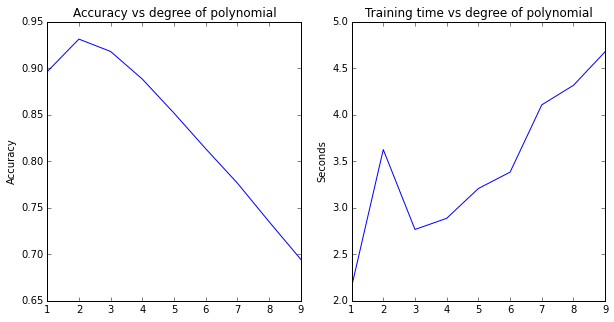

In [92]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5])
ax1.plot(map(lambda x: x[0],SVMscores),map(lambda x: x[1],SVMscores))
ax2.plot(map(lambda x: x[0],SVMscores),map(lambda x: x[2],SVMscores))
ax1.set_title('Accuracy vs degree of polynomial')
ax2.set_title('Training time vs degree of polynomial')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Seconds')

In [95]:
SVMscores2 = []
for i in range(10,4000,100):
    print i
    start = time.time()
    clf = SVC(kernel='poly',degree=2)
    clf.fit(X=df.drop('label',1)[:i],y=df.label[:i])
    stop = time.time()
    SVMscores2.append((i,clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000]),stop-start))

10
110
210
310
410
510
610
710
810
910
1010
1110
1210
1310
1410
1510
1610
1710
1810
1910
2010
2110
2210
2310
2410
2510
2610
2710
2810
2910
3010
3110
3210
3310
3410
3510
3610
3710
3810
3910


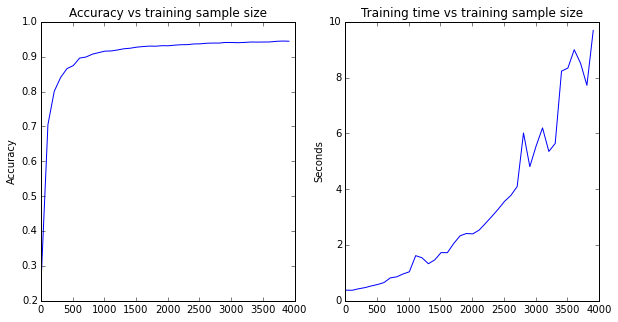

In [97]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5])
ax1.plot(map(lambda x: x[0],SVMscores2),map(lambda x: x[1],SVMscores2))
ax2.plot(map(lambda x: x[0],SVMscores2),map(lambda x: x[2],SVMscores2))
ax1.set_title('Accuracy vs training sample size')
ax2.set_title('Training time vs training sample size')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Seconds')

Above, it appears that we get diminishing returns on training data after around 2500 samples, but training time continues to increase.

Below, I'm experimenting using PyBrain for classification. Unfortunately, my computer is too slow for running ideal tests.

In [7]:
from pybrain.datasets            import ClassificationDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer

In [8]:
trndata = ClassificationDataSet(784, 1, nb_classes=10)
for row in range(2000):
    trndata.addSample(df.iloc[row][1:],df.iloc[row].label)

In [9]:
trndata._convertToOneOfMany()

In [10]:
trndata

In [11]:
fnn = buildNetwork(trndata.indim, 1, trndata.outdim, outclass=SoftmaxLayer)
trainer = BackpropTrainer(fnn, dataset=trndata, verbose=True, lrdecay=0.9999)

In [12]:
#trainer.train()
#for i in range(5):
#    trainer.train()
trainer.trainUntilConvergence()

Total error:  0.0480206845109
Total error:  0.0453919582018
Total error:  0.0449854252275
Total error:  0.0448983248692
Total error:  0.0445740025006
Total error:  0.0444098347057
Total error:  0.0443326920575
Total error:  0.0442885656464
Total error:  0.0442497545897
Total error:  0.044219949138
Total error:  0.0442288239367
Total error:  0.0442381079916
Total error:  0.0442712243229
Total error:  0.0442617477617
Total error:  0.0442519701935


KeyboardInterrupt: 

In [13]:
(df[2000:3000].apply(lambda x: np.argmax(fnn.activate(x[1:])),axis=1) == df[2000:3000].label).mean()

0.17599999999999999

If I use 1 hidden layer of 1 node, I get poor results.

In [14]:
fnn = buildNetwork(trndata.indim, 100,100, trndata.outdim, outclass=SoftmaxLayer)
trainer = BackpropTrainer(fnn, dataset=trndata, verbose=True, lrdecay=0.9999)

In [15]:
for i in range(10):
    trainer.train()

Total error:  0.0524239510962
Total error:  0.0392389045729
Total error:  0.0340594759414
Total error:  0.0305124662835
Total error:  0.0296978235387
Total error:  0.0294336482809
Total error:  0.0283543328405
Total error:  0.0269198726297
Total error:  0.0265610833887
Total error:  0.0261145814764


In [16]:
for i in range(10):
    trainer.train()

Total error:  0.025913744983
Total error:  0.0254646815755
Total error:  0.0254905226993
Total error:  0.0252118642898
Total error:  0.0250105650706
Total error:  0.0248721401679
Total error:  0.0247512797811
Total error:  0.0246819698462
Total error:  0.0246043500601
Total error:  0.0245400895037


In [17]:
(df[2000:3000].apply(lambda x: np.argmax(fnn.activate(x[1:])),axis=1) == df[2000:3000].label).mean()

0.60799999999999998

With 2 layers of 100 hidden units each, it works better, but not as well as an SVM or RFC.

What do different digits 'look like' to the neural net?

In [359]:
number = 3
myimage = np.repeat(0,784)
score = fnn.activate(myimage)[number]
for i in range(1000):
    changes = np.random.choice(range(0,2),784)
    if fnn.activate(myimage+changes)[number]>score:
        myimage = myimage+changes
        score = fnn.activate(myimage+changes)[number]
for i in range(2000):
    changes = np.random.choice(range(-1,2),784)
    if fnn.activate(myimage+changes)[number]>score:
        myimage = myimage+changes
        score = fnn.activate(myimage+changes)[number]

In [360]:
score

0.93789297998992716

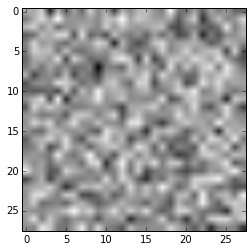

In [361]:
plt.imshow(myimage.reshape(28,28))

I can kinda see a 3 in there.


In [612]:
fnn = buildNetwork(trndata.indim, 50,50,50,50,50,50, trndata.outdim, outclass=SoftmaxLayer)
trainer = BackpropTrainer(fnn, dataset=trndata, verbose=True, lrdecay=0.9999)

for i in range(10):
    trainer.train()

Total error:  0.0466100441464
Total error:  0.044075497684
Total error:  0.042010289126
Total error:  0.03872706138
Total error:  0.0370220576986
Total error:  0.0357495839004
Total error:  0.0341166444631
Total error:  0.033417411119
Total error:  0.0323698389806
Total error:  0.0316099609585


In [613]:
for i in range(10):
    trainer.train()

Total error:  0.0314074707964
Total error:  0.0308644661138
Total error:  0.0301751117521
Total error:  0.0298814232581
Total error:  0.0293625939973
Total error:  0.029327503298
Total error:  0.0290782672446
Total error:  0.028958074085
Total error:  0.0287476476459
Total error:  0.0286683246549


Maybe if I try generating some features?

Like: average darkness?

In [29]:
df[df['label']==1][:100][df.columns[1:]].mean().mean()

19.820739795918374

In [30]:
df[df['label']==2][:100][df.columns[1:]].mean().mean()

38.00432397959184

In [31]:
df[df['label']==3][:100][df.columns[1:]].mean().mean()

35.71001275510205

In [35]:
df[df['label']==0][:100][df.columns[1:]].mean().mean()

43.94966836734693

In [608]:
df[df['label']==2][:100][df.columns[1:]].std(axis=1).mean()

81.89310691075784

In [609]:
df[df['label']==1][:100][df.columns[1:]].std(axis=1).mean()

61.87510660402109

In [622]:
df['mean'] = df[df.columns[1:785]].mean(axis=1)
df['std'] = df[df.columns[1:785]].std(axis=1)

In [623]:
clf = RandomForestClassifier(60)
clf.fit(X=df.drop('label',1)[:20000],y=df.label[:20000])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [624]:
clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000])

0.95220000000000005

In [625]:
clf = SVC(kernel='poly',degree=2)
clf.fit(X=df.drop('label',1)[:2000],y=df.label[:2000])

print clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000])

0.9314


I don't get much improvement from adding the mean and std color for each image.

Doing more complex feature extraction than this would be bordering on computer vision.